<a href="https://colab.research.google.com/github/afscomercial/big-data-fundamental/blob/main/assigment-one/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CBD 2214 1 - Big Data Fundamentals Data Storage Networking
## Assignment 1: Build a performing machine learning Regression algorithm 

Group 2:
* Andrea Franco C0931897
* Andres Salguero C0932873
* Harpreet Kaur 

## I) Business Case Evaluation: Seoul Bike Demand Prediction

**Justification & Motivation:**

The **scope** of this project is to predict the demand of bikes for a shop in the city of Seoul, Korea.

The **motivation** behind this project is to help the bike store to predict how many bikes should have available for rent depending on the weather condition.

In order to know which business challenges the analysis will tackle, we can stablish certain key points that will help us to guide the data analysis in a effective way and evaluate the success of our model:

**The problem** we will be tackling is the inconsistent bike availability due to unpredictable demand which leads to lost revenue (bikes unavailable during peak times) and customer unsatisfaction (unavailable bikes or too few choices).

**The solution** is the development of a bike rental demand prediction model using historical rental data and available weather information to train the model.

**Business Challenges Tackled:**

The specific business challenges that we will be helping to tackle are:

* **Demand forecasting**
* **Inventory management**
* **Customer experience**

**Goals:**

The goals that we will be targeting are:

* **Reduce lost revenue:** Make accurate predictions of peak demand periods to ensure enough bikes are available for rent. 
* **Improve customer satisfaction:** Minimize wait times and ensure an adequate number of bikes are available when needed.
* **Optimize operational efficiency:** Reduce unnecessary bike replenishment, saving time and resources.


**Key Performance Indicators (KPIs):**

Once the model has been deployed, the following KPIs could be proposed to evaluate the performance of the solution, creating a new phase of the project in which the dataset is fed with new data, and re-trained to give better results.

* **Bike rental revenue:** Track changes in revenue after implementing the prediction model.
* **Bike availability:** Monitor the difference between the number of bikes available for rent and the rent demand, specially during peak hours. 
* **Customer satisfaction:** Conduct surveys to measure customer experience.
* **Operational efficiency:** Track the time and resources spent on replenish bikes across locations.



## II) Data Identification

## Data Identification Phase

The next phase of the project is data identification which involves describing the specific datasets required to build our bike rental demand prediction model. As this project will focus on identifying data sources that provide historical information on bike rentals and relevant weather conditions in Seoul, Korea, the "Seoul Bike Sharing Demand Prediction" (E et al., 2020) will have enough data to take a first approach into the data analysis and development of our regression model.

This dataset provide us with information about historical public bike rental from the government of Korea and weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall). 

This data was obtained from [Kaggle Website](https://www.kaggle.com/datasets/saurabhshahane/seoul-bike-sharing-demand-prediction) but the acknowledgments cite the original paper from which it was obtained at the Mendeley database and the original paper at Science Direct (E et al., 2020).

In order to create a more robust model, other types of dataset could be used for a second approach of the problem, getting data from both internal an external data sources, being internal data those coming from the bike rental companies interested in getting a better performance for their business, for instance:

**Internal Data Sources:** 
    
* Daily or hourly rental records
* Bike type (e.g., road bike, mountain bike)
* Pickup and drop-off locations
* Customer information (optional, anonymized)

**External Data Sources:**

Publicly available weather datasets for Seoul, Korea. Potential sources include:

* South Korean national weather service websites
* Open-source weather data repositories like [National Oceanic and Atmospheric Administration (NOAA) ](https://www.noaa.gov/climate)
* Weather APIs offered by private companies

Depending on the chosen data sources, it might be need to integrate data from multiple sources and make some preprocessing to ensure consistency before feeding it into our model.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.patches as patches

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/afscomercial/big-data-fundamental/main/assigment-one/SeoulBikeData.csv", encoding='unicode_escape')
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

### Step 5: Data cleansing and validation

This process helps in removing inconsitent data from our dataset so that we can gain better insighths on our data which could lead to better analysis.For this we will use functions like isnull, duplicated() so that if data has any consistency it can be removed.in this dataset we didnot drop any value because all the values are useful in this dataset for our analysis. Also we will transform our qualtitative feature to quantitative features,these features would be Seasons,Holiday,Function Day .In order to validate our data to make sure that whether it is according to the structure that we need, to check whether it will require any removall of the inaccurate data and to check the relationship within the features in our dataset. To ensure this we had to remove the missing value or duplicate values in our dataset using nunique() function.

In [7]:
# checking for null values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

*** As there is no null values in our dataset we don't need to drop any values

In [8]:
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

 ### Dropping columns
 here we would not be dropping any columns as all are being used for analysis so we would be skipping this step

### converting qualitative features into quantitative
  here  we will convert Seasons,Holiday,Functioning Day into Quantitative feature.



In [9]:
 categorical_df = pd.DataFrame(df)

In [10]:
le = LabelEncoder()

In [11]:
# converting Seasons type
categorical_df['Seasons'] = le.fit_transform(categorical_df['Seasons'])
label_mapping = dict(enumerate(le.classes_))
print(label_mapping)

{0: 'Autumn', 1: 'Spring', 2: 'Summer', 3: 'Winter'}


In [12]:
# converting Holiday type
categorical_df['Holiday'] = le.fit_transform(categorical_df['Holiday'])
label_mapping = dict(enumerate(le.classes_))
print(label_mapping)



{0: 'Holiday', 1: 'No Holiday'}


In [13]:
# converting Functioning Day type
categorical_df['Functioning Day '] = le.fit_transform(categorical_df['Functioning Day'])
label_mapping = dict(enumerate(le.classes_))
print(label_mapping)


{0: 'No', 1: 'Yes'}


### Step 6 Data Representation and Aggregation

This process include representing and aggregating our data.Data aggregation is basically a process to combine multiple dataset into one single dataset so that it will make our analysis easier to work with.This step is important as it processes the large amount of data in lesser time.However in our case this step will not be included as we donot have any multiple data set in our analysis and the data is in the format of csv file .

### Step : Data Visualization
    presenting number of rented bikes on the basis of hours

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

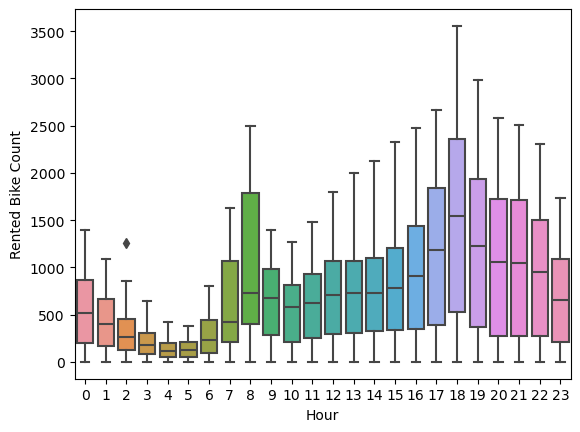

In [14]:
sns.boxplot(x='Hour', y='Rented Bike Count', data = df)

In [15]:
 # Presenting rainfall on the basis of temperature

<Axes: xlabel='Temperature(°C)', ylabel='Rainfall(mm)'>

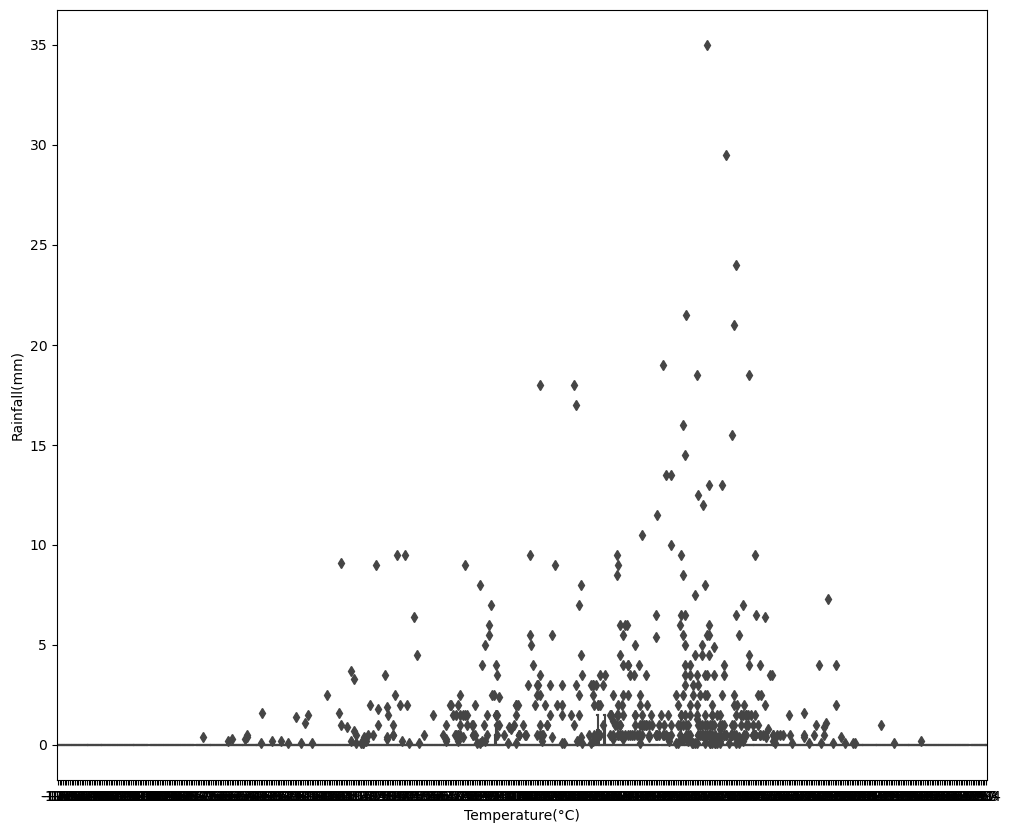

In [16]:
plt.figure(figsize=(12,10))
sns.boxplot(x='Temperature(°C)', y='Rainfall(mm)', data = df)

<Axes: xlabel='Temperature(°C)', ylabel='Snowfall (cm)'>

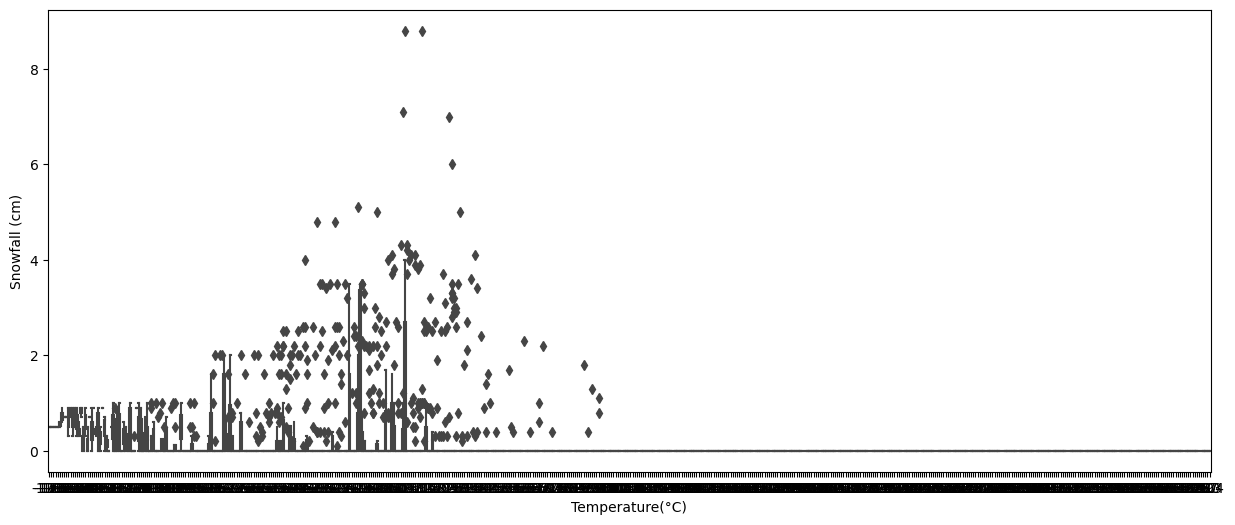

In [17]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Temperature(°C)', y='Snowfall (cm)', data = df)

<Axes: >

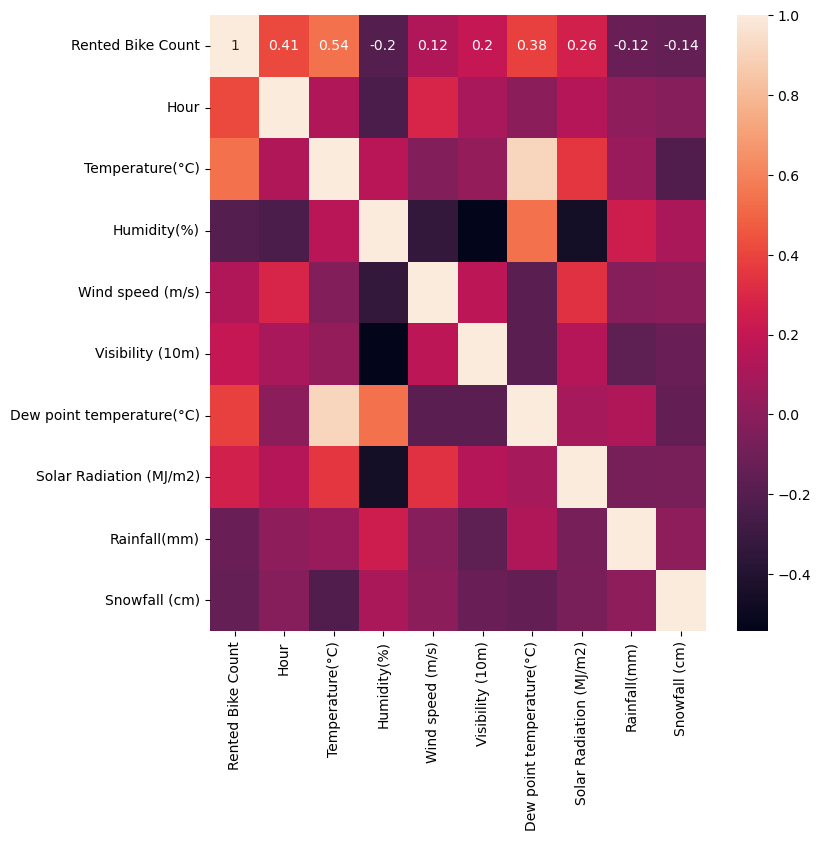

In [18]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True)

<function matplotlib.pyplot.show(close=None, block=None)>

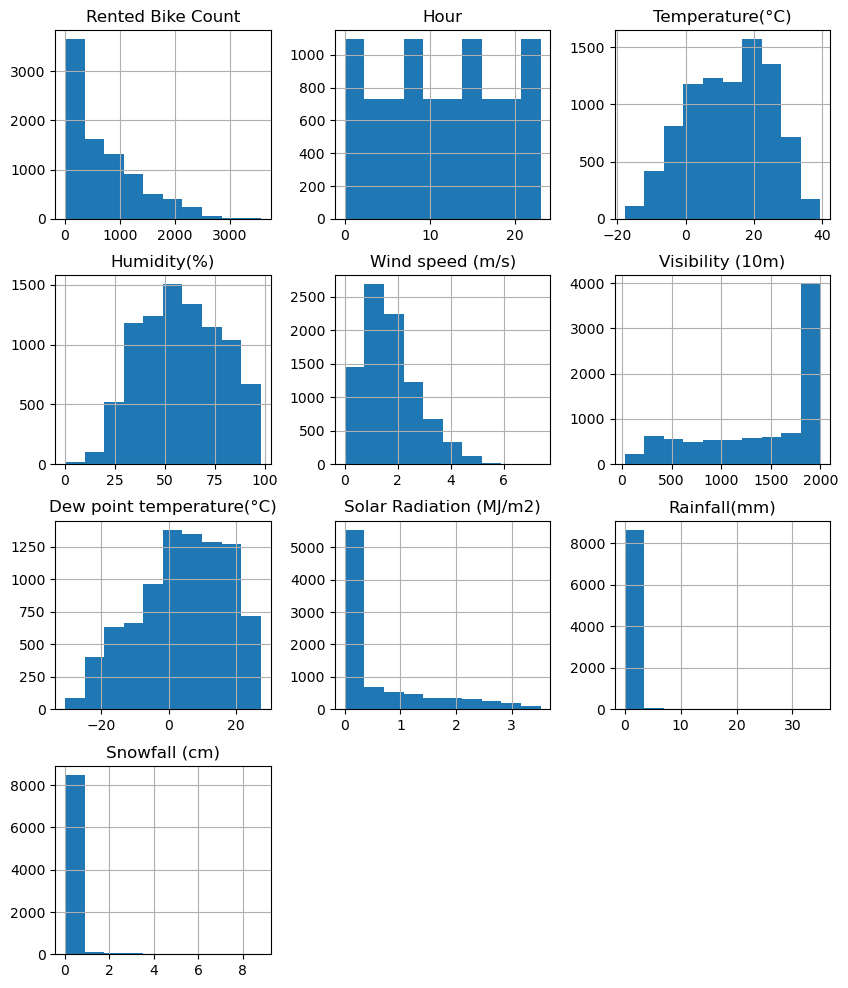

In [19]:
df.hist(figsize=(10,12))
plt.show

Text(0.5, 1.0, 'Functioning Day ')

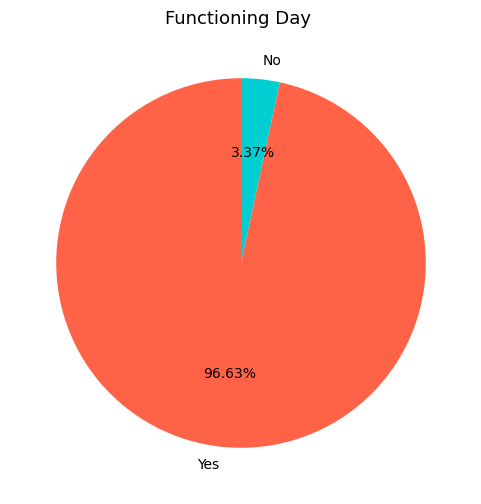

In [20]:
gen_count=df['Functioning Day'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gen_count, labels=gen_count.index, autopct='%1.2f%%', startangle=90, colors=['#FF6347', '#00CED1', '#FFD700', '#32CD32'])
plt.title('Functioning Day ', fontsize=13, fontweight='normal')

## References

 E, S. V., Park, J., & Cho, Y. (2020). Using data mining techniques for bike sharing demand prediction in metropolitan city. Computer Communications, 153, 353–366. https://doi.org/10.1016/j.comcom.2020.02.007